## Relation Dataset Analysis
#### David da Costa Correia @ FCUL & INSA
1. Overlap of the databases in terms of:
    1. PMIDs
    2. ncRNAs
    3. Diseases
    4. Relations

In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
from venn import venn

In [2]:
def make_venn(df, col, dbs):
    sets = {}
    for db in dbs:
        _set = set(df[df['DB']==db][col])
        sets[db] = _set
    venn(sets, figsize=(15,10))
    plt.title(f'{col}')
    plt.show()

In [3]:
data = pd.read_csv('../outputs/dataset/rel_dataset.csv', sep='\t')
data['Relation'] = data.apply(lambda row: (row['RNAC ID'], row['HPO ID']), axis=1)
dbs = ['HMDD','lncRNA-Disease','ncrPheno','RIscoper','RNADisease']

In [4]:
n_rels = len(data['Relation'].unique())
n_orig = len(data[data['DB'] != 'Ancestor Propagation']['Relation'].unique())
n_rnas = len(data['RNAC ID'].unique())
n_phen = len(data['HPO ID'].unique())
n_arts = len(data['PMID'].unique())

print(f'Relations:        {n_rels}')
print(f'Original:         {n_orig}')
print(f'From propagation: {n_rels-n_orig}')
print(f'ncRNAs:           {n_rnas}')
print(f'Phenotypes:       {n_phen}')
print(f'Articles:         {n_arts}')

Relations:        214300
Original:         47798
From propagation: 166502
ncRNAs:           4891
Phenotypes:       2413
Articles:         53427


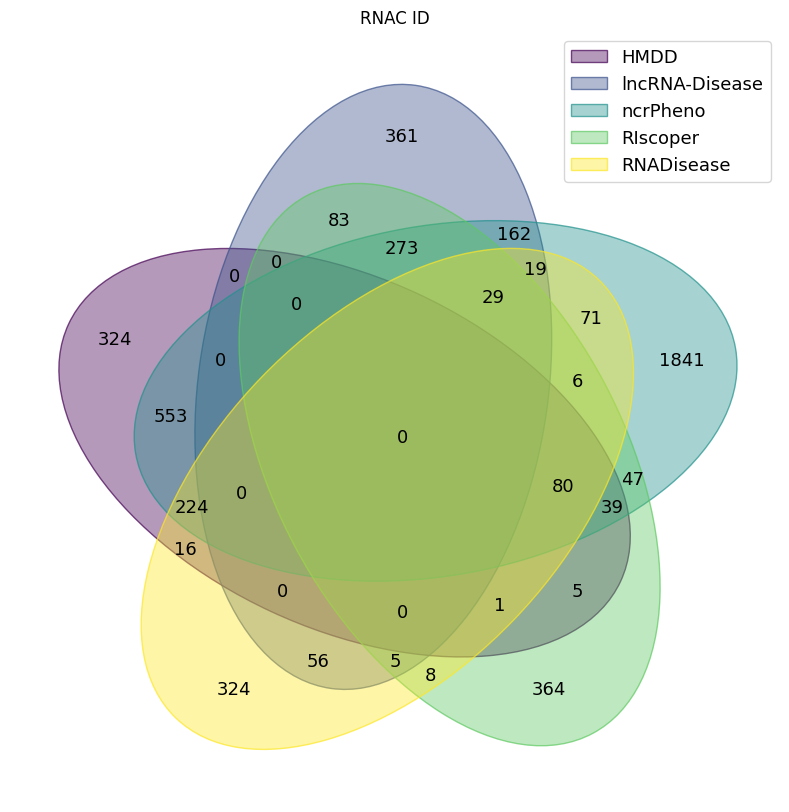

In [5]:
make_venn(data, 'RNAC ID', dbs)

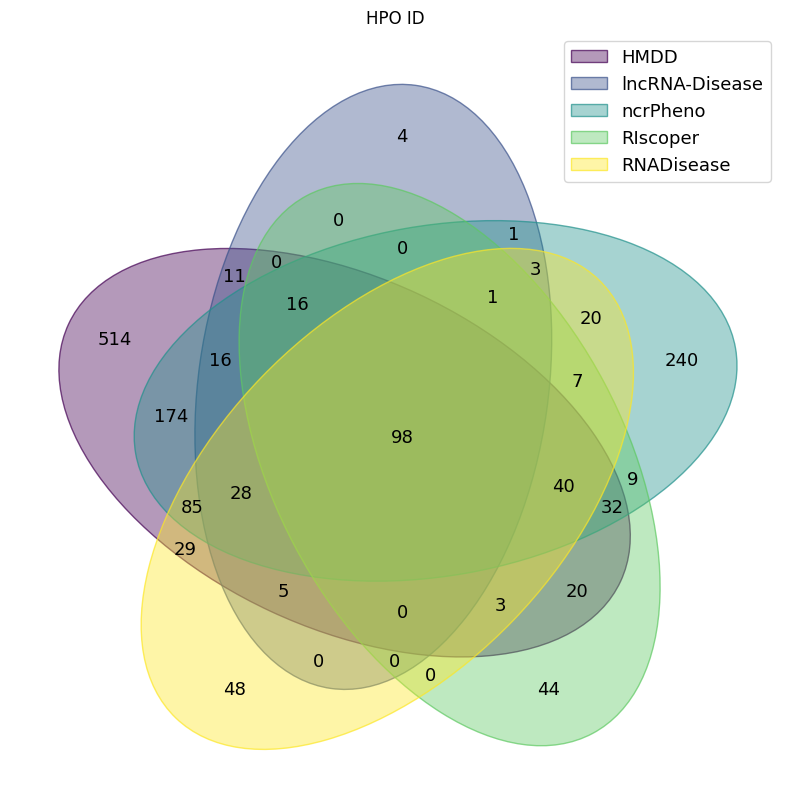

In [6]:
make_venn(data, 'HPO ID', dbs)

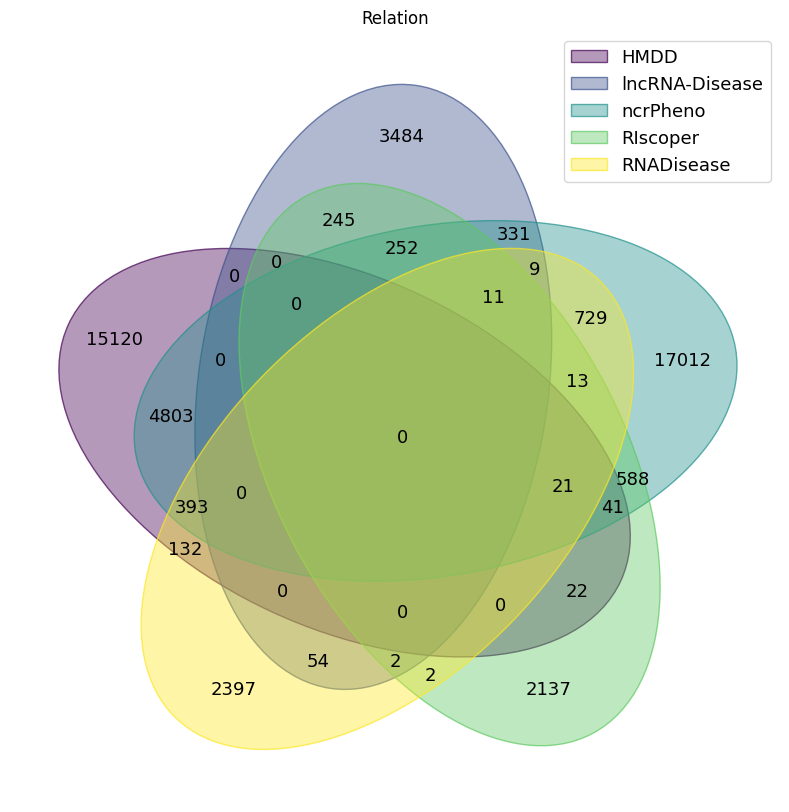

In [7]:
make_venn(data, 'Relation', dbs)

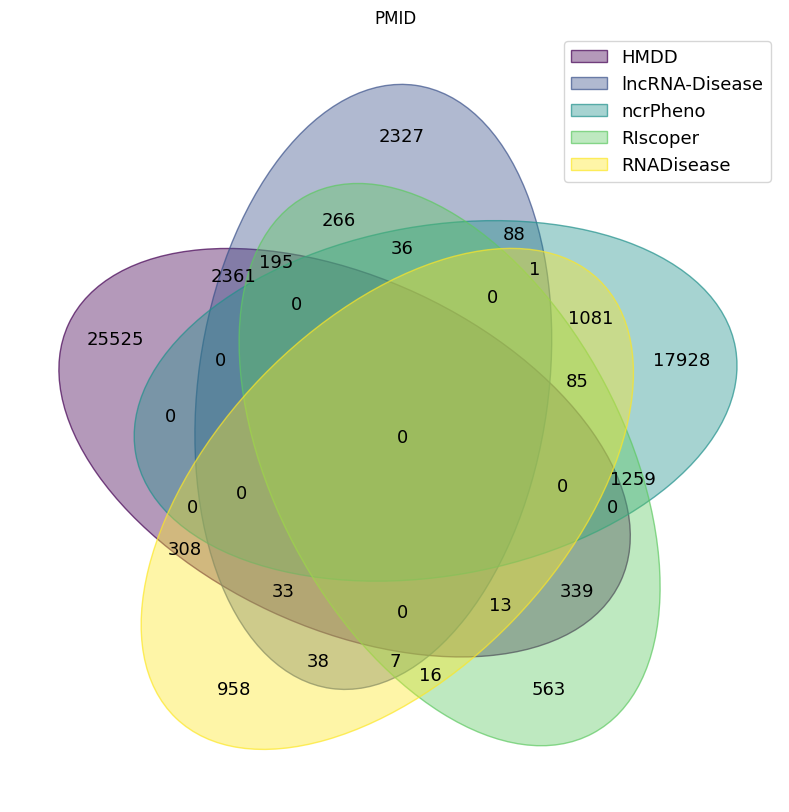

In [8]:
make_venn(data, 'PMID', dbs)